# **Load Important Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data collection
import yfinance as yf

#Data Scaling
from sklearn.preprocessing import MinMaxScaler

#LSTM
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Thurlo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Load the data**

In [2]:
#Load data (Amazon)

df = pd.read_csv('amazon_stock_data.csv')
df 

,Date,Open,High,Low,Close,Volume
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000
...,...,...,...,...,...,...
6893,2024-10-07 00:00:00-04:00,182.949997,183.600006,180.250000,180.800003,42364200
6894,2024-10-08 00:00:00-04:00,181.919998,183.089996,180.919998,182.720001,26372100
6895,2024-10-09 00:00:00-04:00,182.820007,185.850006,182.050003,185.169998,26343100
6896,2024-10-10 00:00:00-04:00,187.130005,188.130005,185.830002,186.649994,27785000


# Splitting the Dataset

In [3]:
# Create a new dataframe with only the 'Close column
close = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = close.values
# Get the number of rows to train the model on
training_len = int(np.ceil( len(dataset) * .7 ))

training_len

4829

In [4]:
# Using Min Max Scalar to scale the data
sc = MinMaxScaler(feature_range=(0,1))

#Scaling the close (closing price) data
sc_close = sc.fit_transform(close)
sc_close

array([[1.40674067e-04],
       [8.33590646e-05],
       [7.81522720e-05],
       ...,
       [9.25824106e-01],
       [9.33226668e-01],
       [9.44080523e-01]])

In [5]:
# Create the training data set
# Create the scaled training data set
train_data = sc_close[0:int(training_len), :]

# creating empty sets
x_train = []
y_train = []

# Split the data into x_train and y_train data sets
for i in range(60 ,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)


[array([1.40674067e-04, 8.33590646e-05, 7.81522720e-05, 5.99159022e-05,
       7.81272293e-06, 0.00000000e+00, 2.60490928e-05, 4.68913558e-05,
       3.38668094e-05, 2.73495239e-05, 2.60490928e-05, 2.86549859e-05,
       2.08372693e-05, 5.20679257e-06, 3.64677088e-05, 6.51277256e-05,
       7.29404486e-05, 4.68913558e-05, 3.64677088e-05, 5.20981856e-05,
       4.68913558e-05, 4.42854254e-05, 2.73495239e-05, 2.86549859e-05,
       2.86549859e-05, 3.25613474e-05, 2.60490928e-05, 2.86549859e-05,
       2.86549859e-05, 2.86549859e-05, 2.34431624e-05, 3.64677088e-05,
       2.99554543e-05, 4.81917869e-05, 1.28949989e-04, 1.51092721e-04,
       2.26639062e-04, 2.31850886e-04, 2.91766788e-04, 2.24033169e-04,
       1.84959530e-04, 2.60505909e-04, 2.34456816e-04, 2.05801793e-04,
       1.90171353e-04, 1.96683608e-04, 1.84959530e-04, 2.24033169e-04,
       2.16220446e-04, 2.08402730e-04, 2.31850886e-04, 2.70924525e-04,
       2.63111802e-04, 2.50087256e-04, 2.55294085e-04, 2.29244993e-04,
     

In [6]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[1.40674067e-04, 8.33590646e-05, 7.81522720e-05, ...,
        2.13614516e-04, 1.95378183e-04, 2.24033169e-04],
       [8.33590646e-05, 7.81522720e-05, 5.99159022e-05, ...,
        1.95378183e-04, 2.24033169e-04, 2.33151354e-04],
       [7.81522720e-05, 5.99159022e-05, 7.81272293e-06, ...,
        2.24033169e-04, 2.33151354e-04, 2.00589969e-04],
       ...,
       [1.56255564e-01, 1.53924753e-01, 1.51346358e-01, ...,
        1.83575097e-01, 1.83732661e-01, 1.84703001e-01],
       [1.53924753e-01, 1.51346358e-01, 1.50203457e-01, ...,
        1.83732661e-01, 1.84703001e-01, 1.86145994e-01],
       [1.51346358e-01, 1.50203457e-01, 1.64605980e-01, ...,
        1.84703001e-01, 1.86145994e-01, 1.85823387e-01]])

In [7]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4769, 60, 1)

# Model 1 : Artificial Neural Network


In [8]:
# Build the ANN model
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(units = 128, activation = 'relu', input_shape= (x_train.shape[1], )))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 16))
model.add(Dense(1))

optimizer = Adam(learning_rate = 0.002)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=12)

Epoch 1/10


C:\Users\Thurlo\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0013
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1305e-05
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4308e-06
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3217e-06
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1678e-05
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6944e-06
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7364e-06
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6853e-06
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9844e-06
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2978e-06


In [9]:
# Create the testing data set
test_data = sc_close[training_len - 60: , :]


# Create the empty sets x_test and y_test
x_test = []
y_test = dataset[training_len:, :]

# Populating
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1 ))
x_test.shape

(2069, 60, 1)

In [10]:
# Get the models predicted price values
predictions = model.predict(x_test)

#reshaping the prediction data
predictions = predictions.reshape(-1,1)

# transforming scaled data
predictions = sc.inverse_transform(predictions)

#convert predictions to an array
predictions = np.array(predictions)
predictions.shape

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(2069, 1)

In [11]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('rmse : ', rmse)

#Mean Square Error
from sklearn.metrics import mean_squared_error

# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test,predictions)
print('mse : ' , mse)

#mean absolute error
mae = np.mean(np.abs(y_test - predictions))
print('mae : ', mae )

rmse :  8.149382115204954
mse :  66.41242885962238
mae :  6.61766608133588


C:\Users\Thurlo\AppData\Local\Temp\ipykernel_16988\891492763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


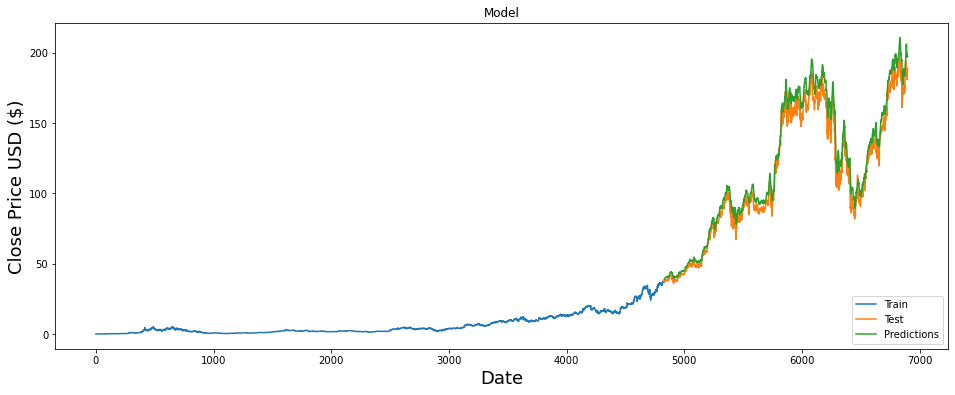

In [12]:
# Plot the data
train = close[:training_len]
valid = close[training_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()